In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pgeocode
import seaborn as sns
import mpl_toolkits
nomi = pgeocode.Nominatim('ca')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

## Dataset 1: Government Radon and Thoron Data ##

# New columns to store latitude and longitude
df = pd.read_csv('discovery/data/radon-thoron.csv', encoding='latin-1')

# Remove Naan values for plotting purposes
df = df.dropna()

df.head()

,resultNumber,censusMetropolitanArea,province,forwardSortationAreaCodes,testDurationInDays,averageRadonConcentrationInBqPerM3,averageThoronConcentrationInBqPerM3
0,1,Calgary CMA,AB,*,90,89,14.0
1,2,Calgary CMA,AB,*,92,18,14.0
2,3,Calgary CMA,AB,*,91,114,14.0
3,4,Calgary CMA,AB,*,91,185,14.0
4,5,Calgary CMA,AB,*,91,71,14.0


In [88]:
df = df.drop(['testDurationInDays', 'resultNumber', 'averageThoronConcentrationInBqPerM3', 'forwardSortationAreaCodes'], axis=1)
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
censusMetropolitanArea,3160,33,Saint John CMA,115,NaN,NaN,NaN,NaN,NaN,NaN,NaN
province,3160,9,ON,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
averageRadonConcentrationInBqPerM3,3160.0,NaN,NaN,NaN,117.251266,144.387721,14.0,41.0,75.0,139.0,2117.0


In [89]:
conv_values = [1 if values >= 300 else 0 for values in df.averageRadonConcentrationInBqPerM3]
df['averageRadonConcentrationInBqPerM3'] = conv_values
df.head()

,censusMetropolitanArea,province,averageRadonConcentrationInBqPerM3
0,Calgary CMA,AB,0
1,Calgary CMA,AB,0
2,Calgary CMA,AB,0
3,Calgary CMA,AB,0
4,Calgary CMA,AB,0


/var/folders/ss/g73jrmvs7d108fqxld50xgxw0000gn/T/ipykernel_44797/664641846.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['averageRadonConcentrationInBqPerM3'])


<Axes: xlabel='averageRadonConcentrationInBqPerM3', ylabel='Density'>

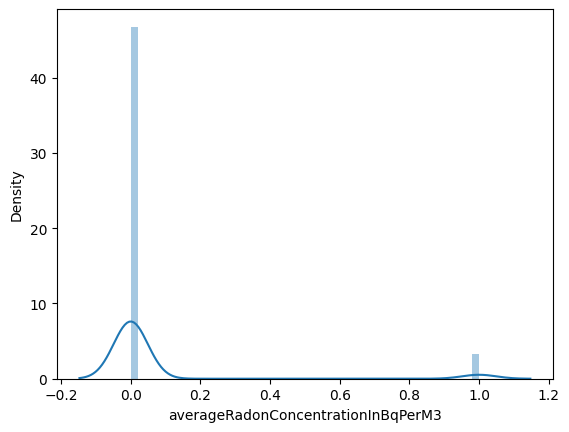

In [90]:
sns.distplot(df['averageRadonConcentrationInBqPerM3'])

[Text(0, 0, 'Calgary CMA'),
 Text(1, 0, 'Edmonton CMA'),
 Text(2, 0, 'Abbotsford CMA'),
 Text(3, 0, 'Kelowna CMA'),
 Text(4, 0, 'Vancouver CMA'),
 Text(5, 0, 'Victoria CMA'),
 Text(6, 0, 'Winnipeg CMA'),
 Text(7, 0, 'Moncton CMA'),
 Text(8, 0, 'Saint John CMA'),
 Text(9, 0, "St. John's CMA"),
 Text(10, 0, 'Halifax CMA'),
 Text(11, 0, 'Barrie CMA'),
 Text(12, 0, 'Brantford CMA'),
 Text(13, 0, 'Greater Sudbury CMA'),
 Text(14, 0, 'Guelph CMA'),
 Text(15, 0, 'Hamilton CMA'),
 Text(16, 0, 'Kingston CMA'),
 Text(17, 0, 'Kitchener CMA'),
 Text(18, 0, 'London CMA'),
 Text(19, 0, 'Oshawa CMA'),
 Text(20, 0, 'Ottawa - Gatineau CMA'),
 Text(21, 0, 'Peterborough CMA'),
 Text(22, 0, 'St. Catharines - Niagara'),
 Text(23, 0, 'Thunder Bay CMA'),
 Text(24, 0, 'Toronto CMA'),
 Text(25, 0, 'Windsor CMA'),
 Text(26, 0, 'Montreal CMA'),
 Text(27, 0, 'Quebec CMA'),
 Text(28, 0, 'Saguenay CMA'),
 Text(29, 0, 'Sherbrooke CMA'),
 Text(30, 0, 'Trois-Rivieres CMA'),
 Text(31, 0, 'Regina CMA'),
 Text(32, 0, 'Sa

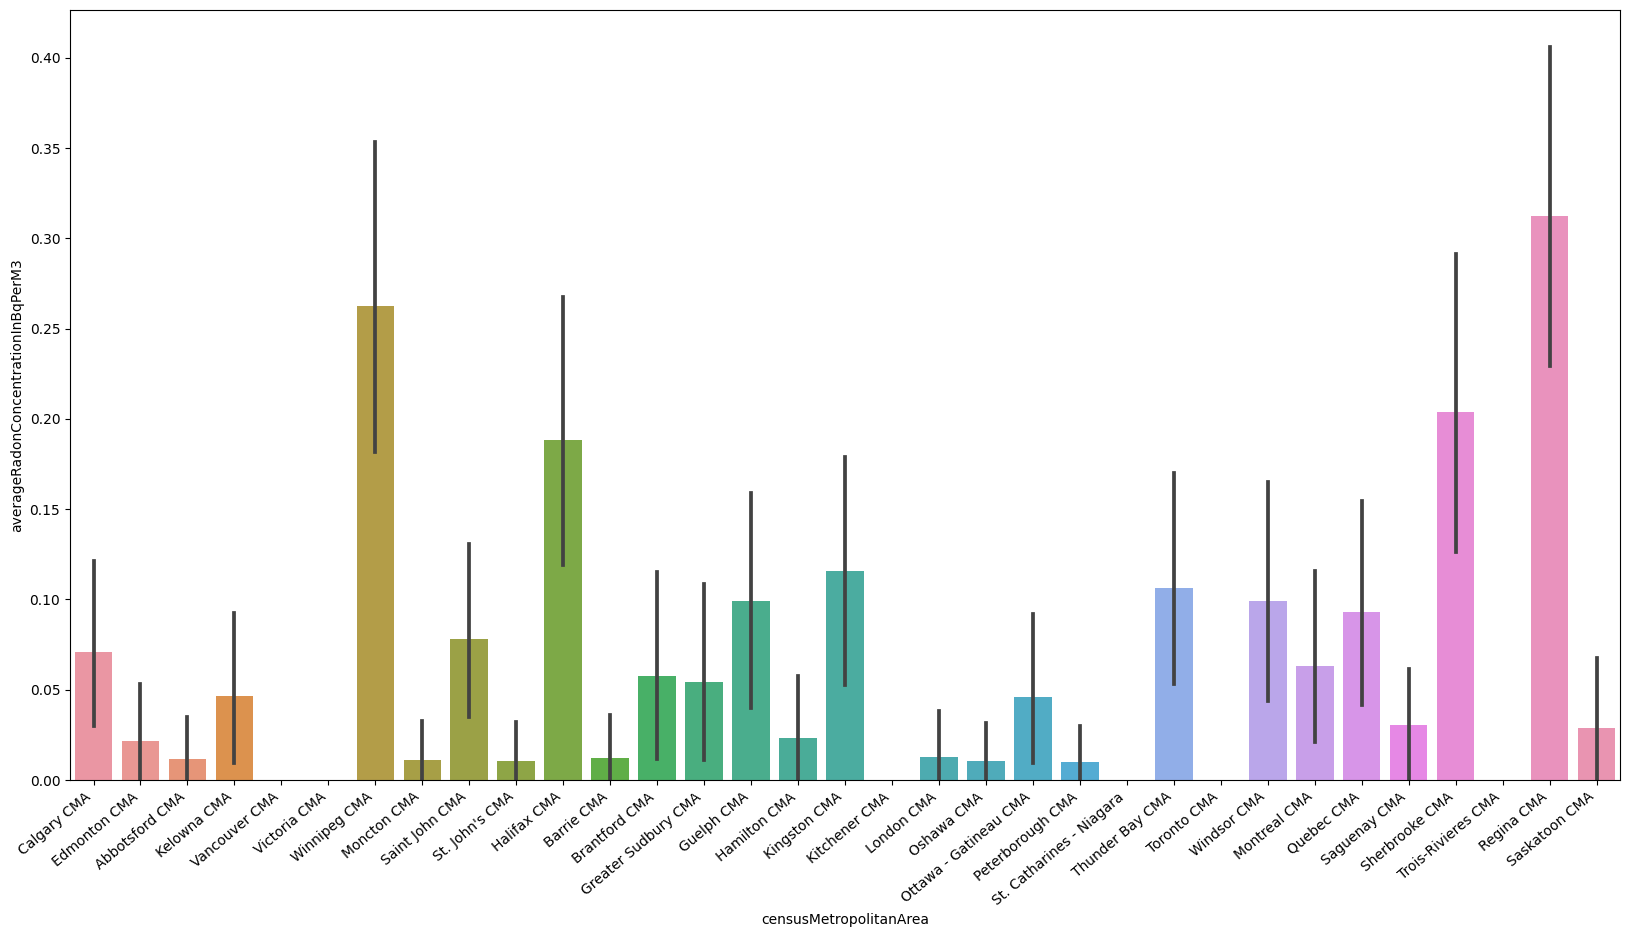

In [91]:
plt.figure(figsize=(20, 10))
ax = sns.barplot(x = 'censusMetropolitanArea', y = 'averageRadonConcentrationInBqPerM3', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


<Axes: xlabel='province', ylabel='averageRadonConcentrationInBqPerM3'>

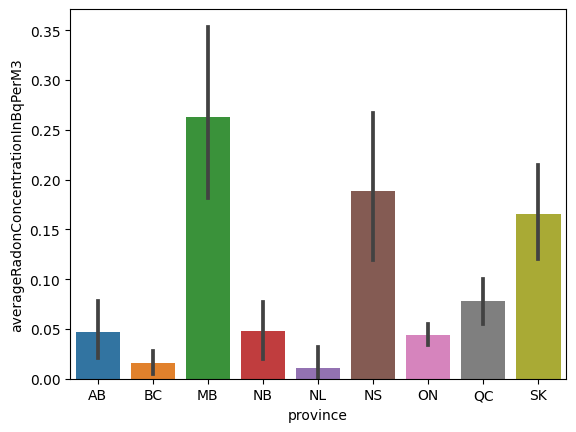

In [92]:
sns.barplot(x = 'province', y = 'averageRadonConcentrationInBqPerM3', data = df)

In [93]:
dummies = ['province', 'censusMetropolitanArea']
dummy_data = pd.get_dummies(df[dummies])
dummy_data.shape

(3160, 42)

In [94]:
data_6 = pd.concat([df, dummy_data], axis = 1)
data_6.drop(dummies, axis=1, inplace=True)

X = data_6.drop('averageRadonConcentrationInBqPerM3', axis = 1)
y = data_6['averageRadonConcentrationInBqPerM3']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
accuracy_score(y_pred, y_test)


0.9338446788111218

In [97]:
confusion_matrix(y_pred, y_test)

array([[974,  69],
       [  0,   0]])

In [ ]:
## Dataset 1: Government Radon and Thoron Data ##